In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set()
from sklearn.feature_extraction.text import CountVectorizer
import nltk

from nltk.tokenize import sent_tokenize,word_tokenize,RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [2]:
df = pd.read_csv(r'E:\Graduation Project\projects\Job-Description-Skills-Extractor-master\data\collected_data\indeed_job_dataset.csv')
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5715 non-null   int64  
 1   Job_Title                         5715 non-null   object 
 2   Link                              5715 non-null   object 
 3   Queried_Salary                    5715 non-null   object 
 4   Job_Type                          5715 non-null   object 
 5   Skill                             5483 non-null   object 
 6   No_of_Skills                      5715 non-null   int64  
 7   Company                           5611 non-null   object 
 8   No_of_Reviews                     4753 non-null   float64
 9   No_of_Stars                       4753 non-null   float64
 10  Date_Since_Posted                 5611 non-null   float64
 11  Description                       5413 non-null   object 
 12  Locati

In [4]:
df2 = pd.read_csv(r'E:\Graduation Project\my\data scrabing\data_out\New folder\job_postings.csv')
df2.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

In [6]:
# scaling down the dataset as the description is all that is required
df_desc = df.Description
df2_desc = df2['description']
print(df_desc.iloc[123])
print('*'*50)
print(df2_desc.iloc[123])



[<p>At Greene, Tweed, you'll find the cutting-edge technology, world-class polymer expertise and endless advancement opportunities you'd expect from a multi-national industry leader. You'll find them all in an environment that embraces diversity in people and opinions, moves decision making to the point of impact, and celebrates your success.</p>, <p>
If you enjoy continuous learning and are excited about working with and creating technological solutions, explore career opportunities with Greene, Tweed.</p>, <p>
We are currently searching for a Data Scientist, based in our Kulpsville, PA headquarters, to help reinvent the way we collect, analyze and take appropriate business action upon our data.</p>, <p>
Responsibilities include but are not limited to the following:</p>, <ul>
<li>Develop predictive models that are insightful &amp; actionable - testing &amp; validating the accuracy &amp; functionality before transitioning to production environment</li>
<li>Manipulate and transform data

In [7]:
print(df2['description'].iloc[123])

Company DescriptionRailPros was founded in 2000 to provide rail and transit engineering and construction services. The firm is headquartered in Irving, Texas and has more than 800 rail and transit engineers, construction, inspection, design, and field support staff across the country. RailPros’ senior staff consists of expert professionals with extensive experience in the rail and transit industry, including former employees of BNSF, UP, Amtrak, Caltrans, and SCRRA, who offer clients time-tested railroad and project experience. RailPros has a unique understanding of the rail and transit needs of the industry and provides project management, construction management, project development, project design, operational support, and railroad coordination.
Role DescriptionThis is a full-time on-site Railroad Worker In Charge role, located across California, Oregon, Washington, Utah, Nevada, and Arizona. The Railroad Worker In Charge will be responsible for supervising and coordinating activiti

In [8]:
#data cleaning 
def data_cleaning(text):
    try:
        #return carriage and new line
        text = text.replace('\n','')
        text = text.replace('\r','')
        
        #brackets 
        text = text.replace(']','')
        text = text.replace('[','')
        text = text.replace('(','')
        text = text.replace(')','')

        #Html format
        clean_html = re.compile('<.*?>')
        clean_text = re.sub(clean_html,' ',text)

        #remove duplicate whitespace in between words
        clean_text = re.sub(' +',' ',clean_text)
        clean_text = clean_text.strip()
        
        #commas had multible space before and after a period
        clean_text = re.sub(' , ',', ',clean_text)
        clean_text = re.sub(',.','.',clean_text)

    except:
        return np.nan
    return clean_text
    

In [9]:
df_desc = df_desc.apply(data_cleaning)
df2_desc = df2_desc.apply(data_cleaning)


In [10]:
print(df2_desc.iloc[123])

Company DescriptionRailPros was founded in 2000 to provide rail and transit engineering and construction services. The firm is headquartered in Irving.Texas and has more than 800 rail and transit engineers.construction.inspection.design.and field support staff across the country. RailPros’ senior staff consists of expert professionals with extensive experience in the rail and transit industry.including former employees of BNSF.UP.Amtrak.Caltrans.and SCRRA.who offer clients time-tested railroad and project experience. RailPros has a unique understanding of the rail and transit needs of the industry and provides project management.construction management.project development.project design.operational support.and railroad coordination.Role DescriptionThis is a full-time on-site Railroad Worker In Charge role.located across California.Oregon.Washington.Utah.Nevada.and Arizona. The Railroad Worker In Charge will be responsible for supervising and coordinating activities of workers who work 

In [11]:
#change the type frame series to dataframe and drop missing values 
df_desc = pd.DataFrame(df_desc)
df2_desc = pd.DataFrame(df2_desc)
df_desc.dropna(inplace=True)
df2_desc.dropna(inplace=True)

In [12]:
df_desc.reset_index(inplace=True,drop=True)
df2_desc.reset_index(inplace=True,drop=True)
df2_desc

,description
0,OverviewHearingLife is a national hearing care...
1,Metalcraft of MayvilleMetalcraft of Mayville i...
2,The TSUBAKI name is synonymous with excellence...
3,descriptionTitle Looking for a great opportuni...
4,Job SummaryAt iHerb.we are on a mission to mak...
...,...
33240,Are you a dynamic and creative marketing profe...
33241,A fast-fashion wholesaler.is looking for a ful...
33242,DuctVentz is a dryer and A/C – heat vent clean...
33243,While many industries were hurt by the last fe...


# Tokenization

In [13]:
#create a temp column for lowercased desription
df_desc['lower_Description'] = df_desc['Description'].str.lower()
df2_desc['lower_description'] = df2_desc['description'].str.lower()


In [14]:
tokenizer = RegexpTokenizer(r'\w+')
df_desc['word_tokenized'] = df_desc['lower_Description'].apply(lambda x : tokenizer.tokenize(x))
df2_desc['word_tokenized'] = df2_desc['lower_description'].apply(lambda x : tokenizer.tokenize(x))
# notice think whene he apply token [words] he used a lower description 
# and when he sent tokenize he use defult description
df_desc['sent_tokenized'] = df_desc['Description'].apply(lambda x : sent_tokenize(x))
df2_desc['sent_tokenized'] = df2_desc['description'].apply(lambda x : sent_tokenize(x))
df_desc.head()

,Description,lower_Description,word_tokenized,sent_tokenized
0,POSITION SUMMARY.The Business Analyst role is ...,position summary.the business analyst role is ...,"[position, summary, the, business, analyst, ro...",[POSITION SUMMARY.The Business Analyst role is...
1,What do we need?.You to have an amazing person...,what do we need?.you to have an amazing person...,"[what, do, we, need, you, to, have, an, amazin...",[What do we need?.You to have an amazing perso...
2,Validate.analyze.and conduct statistical analy...,validate.analyze.and conduct statistical analy...,"[validate, analyze, and, conduct, statistical,...",[Validate.analyze.and conduct statistical anal...
3,Full time.Washington.DC metro area.Starting sa...,full time.washington.dc metro area.starting sa...,"[full, time, washington, dc, metro, area, star...",[Full time.Washington.DC metro area.Starting s...
4,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...


In [15]:
#concat data frame 
df2_desc.rename(columns={'description':'Description','lower_description':'lower_Description'},inplace=True)
df_concat = pd.concat([df_desc,df2_desc],axis=0)
df_concat.head()

,Description,lower_Description,word_tokenized,sent_tokenized
0,POSITION SUMMARY.The Business Analyst role is ...,position summary.the business analyst role is ...,"[position, summary, the, business, analyst, ro...",[POSITION SUMMARY.The Business Analyst role is...
1,What do we need?.You to have an amazing person...,what do we need?.you to have an amazing person...,"[what, do, we, need, you, to, have, an, amazin...",[What do we need?.You to have an amazing perso...
2,Validate.analyze.and conduct statistical analy...,validate.analyze.and conduct statistical analy...,"[validate, analyze, and, conduct, statistical,...",[Validate.analyze.and conduct statistical anal...
3,Full time.Washington.DC metro area.Starting sa...,full time.washington.dc metro area.starting sa...,"[full, time, washington, dc, metro, area, star...",[Full time.Washington.DC metro area.Starting s...
4,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...


In [16]:
#descover the Distribution of sent and tokens
df_concat['word_count'] = df_concat['word_tokenized'].str.len()
df_concat['sent_count'] = df_concat['sent_tokenized'].str.len()

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'word count Distribution')

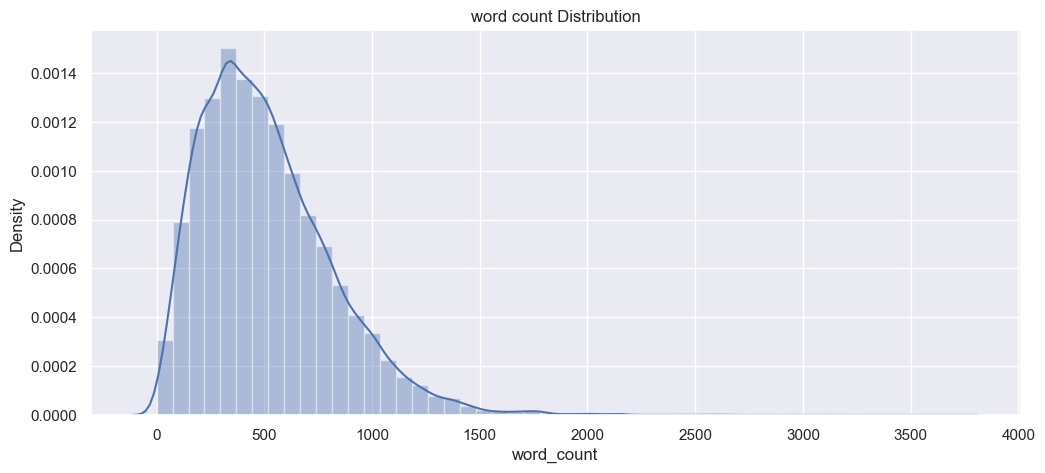

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df_concat['word_count'])
plt.title('word count Distribution')

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Word count ')

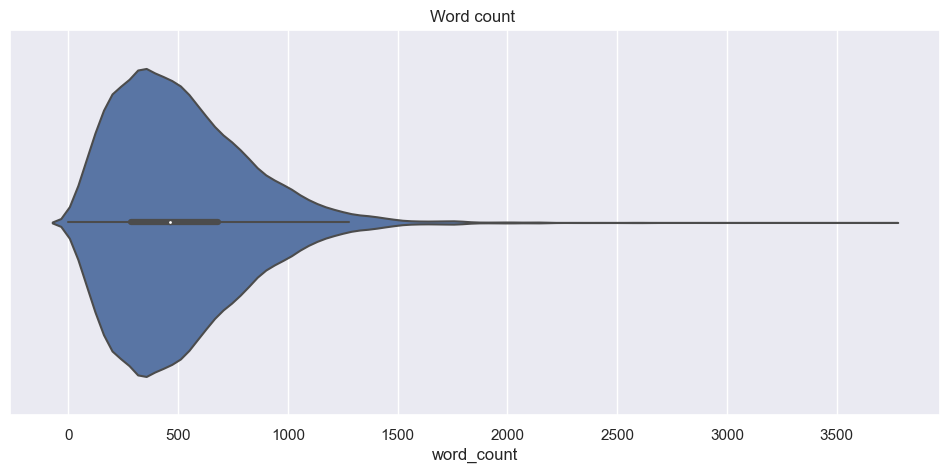

In [18]:
plt.figure(figsize=(12,5))
sns.violinplot(df_concat['word_count'])
plt.title('Word count ')

c:\Users\XPRISTO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'sent count Distribution')

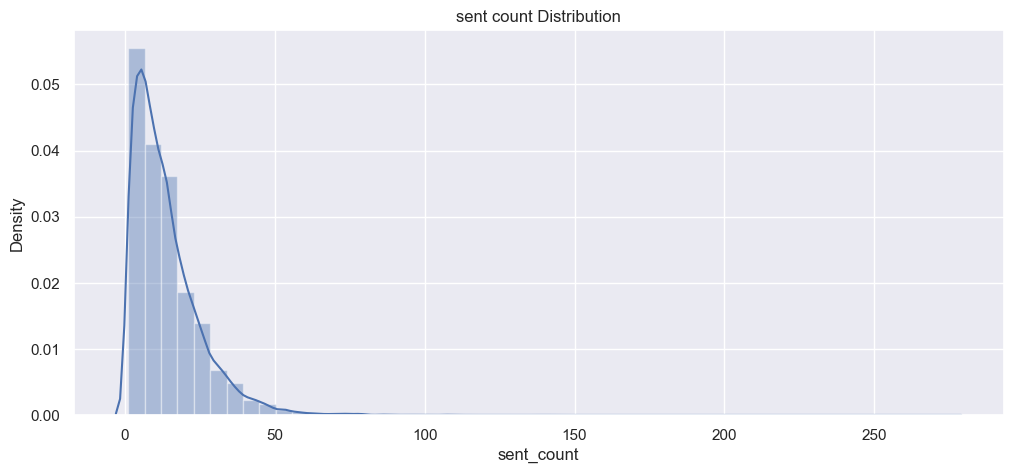

In [19]:
# obtains sentence count for each indiviual job description
plt.figure(figsize=(12,5))
sns.distplot(df_concat['sent_count'])
plt.title('sent count Distribution')

## Descriptive Statistics

In [20]:
df_concat.describe()

,word_count,sent_count
count,38658.000000,38658.000000
mean,510.438046,13.538983
std,303.924358,11.284284
min,0.000000,1.000000
25%,286.000000,6.000000
50%,462.000000,11.000000
75%,683.000000,18.000000
max,3704.000000,275.000000


In [21]:
#indeces to be removed were examined by description of observations who's values were bellow 11
# extra indices included are redundant or had no relevant info;
extra_indices = [20, 21, 36, 155, 428, 478, 685, 900, 1008, 1009]
indices_remove = df_concat.loc[df_concat['word_count']<=12].index
indices_remove = list(indices_remove) +extra_indices
print(len(indices_remove), 'observations to be removed')

98 observations to be removed


In [22]:
df_concat.drop(indices_remove,inplace = True)

## Stop Words

In [23]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38532 entries, 0 to 33244
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Description        38532 non-null  object
 1   lower_Description  38532 non-null  object
 2   word_tokenized     38532 non-null  object
 3   sent_tokenized     38532 non-null  object
 4   word_count         38532 non-null  int64 
 5   sent_count         38532 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [24]:
def stopword_removal(text):
    stop_words = set(stopwords.words('english'))
    cleand  = [word for word in text if word not in stop_words]
    return cleand

In [25]:
df_concat['cleand_words'] = df_concat['word_tokenized'].apply(stopword_removal)
df_concat

,Description,lower_Description,word_tokenized,sent_tokenized,word_count,sent_count,cleand_words
0,POSITION SUMMARY.The Business Analyst role is ...,position summary.the business analyst role is ...,"[position, summary, the, business, analyst, ro...",[POSITION SUMMARY.The Business Analyst role is...,424,19,"[position, summary, business, analyst, role, p..."
1,What do we need?.You to have an amazing person...,what do we need?.you to have an amazing person...,"[what, do, we, need, you, to, have, an, amazin...",[What do we need?.You to have an amazing perso...,286,7,"[need, amazing, personality, communication, st..."
2,Validate.analyze.and conduct statistical analy...,validate.analyze.and conduct statistical analy...,"[validate, analyze, and, conduct, statistical,...",[Validate.analyze.and conduct statistical anal...,314,21,"[validate, analyze, conduct, statistical, anal..."
3,Full time.Washington.DC metro area.Starting sa...,full time.washington.dc metro area.starting sa...,"[full, time, washington, dc, metro, area, star...",[Full time.Washington.DC metro area.Starting s...,297,9,"[full, time, washington, dc, metro, area, star..."
4,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...,316,6,"[assist, consultations, business, partners, in..."
...,...,...,...,...,...,...,...
33240,Are you a dynamic and creative marketing profe...,are you a dynamic and creative marketing profe...,"[are, you, a, dynamic, and, creative, marketin...",[Are you a dynamic and creative marketing prof...,404,5,"[dynamic, creative, marketing, professional, l..."
33241,A fast-fashion wholesaler.is looking for a ful...,a fast-fashion wholesaler.is looking for a ful...,"[a, fast, fashion, wholesaler, is, looking, fo...",[A fast-fashion wholesaler.is looking for a fu...,96,3,"[fast, fashion, wholesaler, looking, full, tim..."
33242,DuctVentz is a dryer and A/C – heat vent clean...,ductventz is a dryer and a/c – heat vent clean...,"[ductventz, is, a, dryer, and, a, c, heat, ven...",[DuctVentz is a dryer and A/C – heat vent clea...,245,2,"[ductventz, dryer, c, heat, vent, clean, busin..."
33243,While many industries were hurt by the last fe...,while many industries were hurt by the last fe...,"[while, many, industries, were, hurt, by, the,...",[While many industries were hurt by the last f...,292,6,"[many, industries, hurt, last, years, people, ..."


## Stemming and Lemmatization

In [26]:
# stemmed and lemma words were both examined to choose which method was best suited
def stemming(text):
    porter = PorterStemmer()
    stemmed = [porter.stem(word)for word in text]
    return stemmed

def lemming(text):
    lemmatizer = WordNetLemmatizer()
    lemmed = [lemmatizer.lemmatize(word) for word in text]
    return lemmed

In [27]:
df_concat['clean_stemmed'] = df_concat['cleand_words'].apply(stemming)
df_concat['clean_lemmed'] = df_concat['cleand_words'].apply(lemming)
df_concat.head()

,Description,lower_Description,word_tokenized,sent_tokenized,word_count,sent_count,cleand_words,clean_stemmed,clean_lemmed
0,POSITION SUMMARY.The Business Analyst role is ...,position summary.the business analyst role is ...,"[position, summary, the, business, analyst, ro...",[POSITION SUMMARY.The Business Analyst role is...,424,19,"[position, summary, business, analyst, role, p...","[posit, summari, busi, analyst, role, primari,...","[position, summary, business, analyst, role, p..."
1,What do we need?.You to have an amazing person...,what do we need?.you to have an amazing person...,"[what, do, we, need, you, to, have, an, amazin...",[What do we need?.You to have an amazing perso...,286,7,"[need, amazing, personality, communication, st...","[need, amaz, person, commun, style, super, org...","[need, amazing, personality, communication, st..."
2,Validate.analyze.and conduct statistical analy...,validate.analyze.and conduct statistical analy...,"[validate, analyze, and, conduct, statistical,...",[Validate.analyze.and conduct statistical anal...,314,21,"[validate, analyze, conduct, statistical, anal...","[valid, analyz, conduct, statist, analysi, dat...","[validate, analyze, conduct, statistical, anal..."
3,Full time.Washington.DC metro area.Starting sa...,full time.washington.dc metro area.starting sa...,"[full, time, washington, dc, metro, area, star...",[Full time.Washington.DC metro area.Starting s...,297,9,"[full, time, washington, dc, metro, area, star...","[full, time, washington, dc, metro, area, star...","[full, time, washington, dc, metro, area, star..."
4,Assist in consultations with business partners...,assist in consultations with business partners...,"[assist, in, consultations, with, business, pa...",[Assist in consultations with business partner...,316,6,"[assist, consultations, business, partners, in...","[assist, consult, busi, partner, intern, exter...","[assist, consultation, business, partner, inte..."


In [28]:
# general corpus & one distinguished with lemmatization applied
# to be used with an additional for loop in the future
lem_corpus=[]
for row in df_concat['clean_lemmed']:
    lem_corpus+=row

stem_corpus=[]
for row in df_concat['clean_stemmed']:
    stem_corpus+=row



In [29]:
len(stem_corpus) ,len(lem_corpus)

(13134285, 13134285)

## Frequent words
#### 1. steemed

In [30]:
def get_top_n_words(corpus):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq

(-0.5, 399.5, 199.5, -0.5)

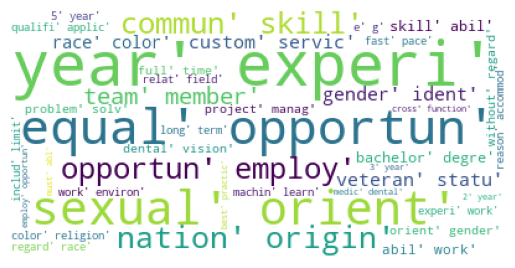

In [31]:
stem_wordcloud = WordCloud(background_color='white',max_words=100,max_font_size=50,min_font_size=6,random_state=123).generate(str(stem_corpus))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [32]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(stem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns = ['word','freq']
top_stem.head()

,word,freq
0,work,141042
1,experi,128896
2,manag,103400
3,team,96056
4,data,85238


In [33]:
top_stem.describe()

,freq
count,202762.000000
mean,64.121502
std,1170.172185
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,141042.000000


Text(0, 0.5, 'Stemmed Word Frequency')

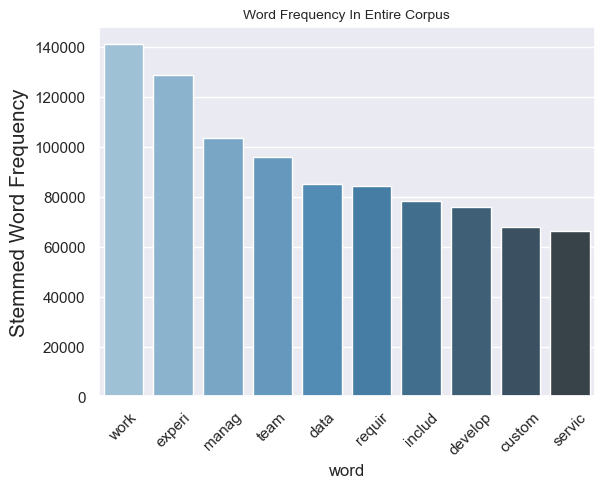

In [34]:
sns.barplot(data = top_stem[0:10],x='word',y='freq',palette='Blues_d')
plt.xticks(rotation = 45)
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Stemmed Word Frequency', size = 15)



(-0.5, 399.5, 199.5, -0.5)

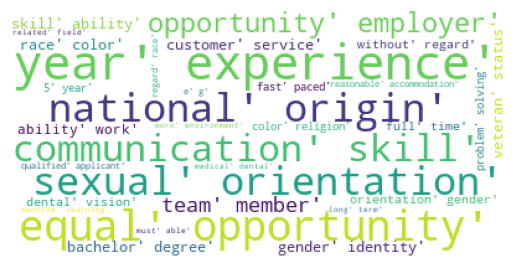

In [35]:
stem_wordcloud = WordCloud(background_color='white',max_words=100,max_font_size=50,min_font_size=6,random_state=123).generate(str(lem_corpus))
plt.imshow(stem_wordcloud)
plt.axis('off')

In [36]:
#Convert most freq words to dataframe for plotting bar plot
top_stem_words = get_top_n_words(lem_corpus)
top_stem = pd.DataFrame(top_stem_words)
top_stem.columns = ['word','freq']
top_stem.head()

,word,freq
0,experience,127792
1,work,106698
2,team,95962
3,data,85238
4,service,65480


Text(0, 0.5, 'Stemmed Word Frequency')

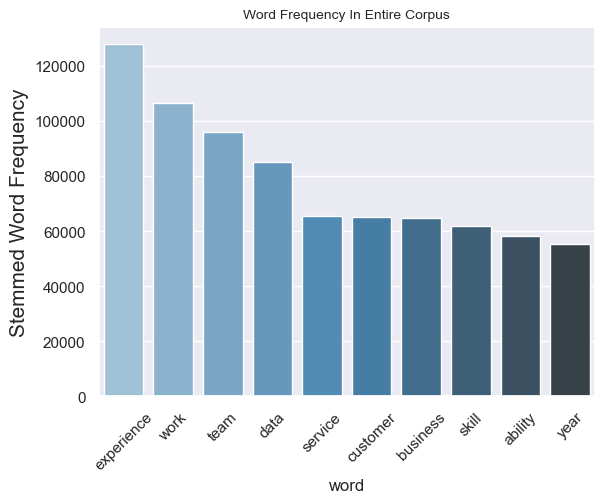

In [37]:
sns.barplot(data = top_stem[0:10],x='word',y='freq',palette='Blues_d')
plt.xticks(rotation = 45)
plt.title('Word Frequency In Entire Corpus', size=10)
plt.ylabel('Stemmed Word Frequency', size = 15)



In [38]:
top_stem[top_stem['word']=='sql']

,word,freq
379,sql,7206


In [39]:
def get_top_n2_words(corpus,n):
    vec = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[0:n]

In [40]:
ngram_corpus = df_concat['cleand_words'].str.join(' ')
ngram_corpus[0:5]

0    position summary business analyst role primary...
1    need amazing personality communication style s...
2    validate analyze conduct statistical analysis ...
3    full time washington dc metro area starting sa...
4    assist consultations business partners interna...
Name: cleand_words, dtype: object

In [41]:
top2_words = get_top_n2_words(ngram_corpus,n=len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns =  ['Bi-gram','freq']
top2_df.head()

,Bi-gram,freq
0,years experience,14710
1,equal opportunity,13969
2,sexual orientation,12350
3,national origin,12046
4,opportunity employer,10965


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

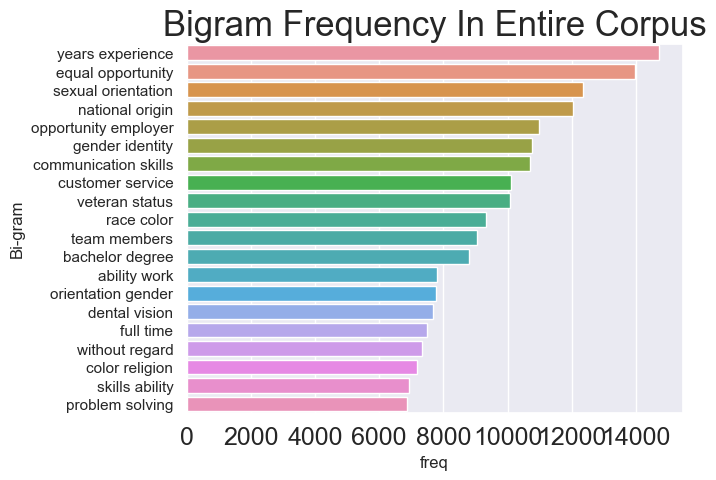

In [42]:
sns.barplot(data=top2_df[0:20],y='Bi-gram',x='freq',orient='h')
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)

In [45]:
def get_top_n3_words(corpus,n):
    vec = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[0:n]

In [47]:
top3_words = get_top_n3_words(ngram_corpus,n=len(ngram_corpus))
top3_df = pd.DataFrame(top3_words)
top3_df.columns =  ['tri-gram','freq']
top3_df.head()

,tri-gram,freq
0,equal opportunity employer,10119
1,sexual orientation gender,7757
2,orientation gender identity,7341
3,race color religion,6513
4,without regard race,6122


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

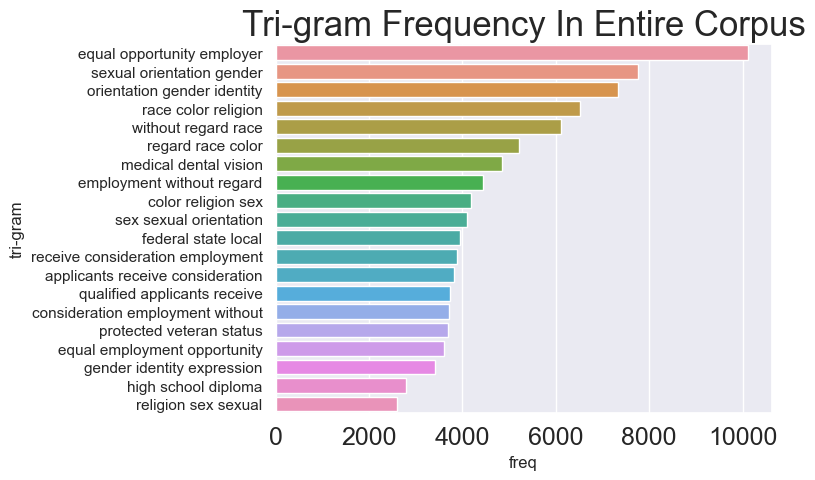

In [48]:
sns.barplot(data=top3_df[0:20],y='tri-gram',x='freq',orient='h')
plt.title('Tri-gram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)